In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set()
sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('Set2')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = [12, 9]

In [56]:
def plot_csv_df(df, xlim=[0,1000]):
    for idx, column in enumerate(columns[2:]):
        fig = plt.figure()
        ax = plt.gca()    
        if column == 'var_max':
            ax.set_ylim([2,3])
        elif column == 'fitness':
            ax.set_yscale('log')
            ax.set_ylim([5,10])
        elif column == 'sigma':
            ax.set_ylim([0,5])
        elif column == 'meand':
            ax.set_yscale('log')
            ax.set_ylim([1e-30,1e2])
        elif column == 'normps':
            ax.set_ylim([2,20])
        ax.set_xlim(xlim)
        df.groupby('Tribe')[column].plot(title=plot_names[idx], ax=ax)
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        sns.despine()

In [57]:
def plot_eigenvalues(t, xlim=[0,100], ylim=[10e-4, 10e1]):
    plt.figure()
    for d in D:
        ax = plt.gca()
        ax.set_yscale('log')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        if d == 'Dmean':
            df[df.Tribe==t][d].plot(ax=ax, c='black', lw=2)
        else:
            df[df.Tribe==t][d].plot(marker='.', ax=ax)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        sns.despine()

In [58]:
D = ['D' + str(i) for i in range(10)] + ['Dmean']
columns = ['Tribe', 'Eval', 'fitness', 'sigma', 'var_max', 'normps', 'meand']
plot_names = ['$Fitness$', '$\sigma$', '$Var(D_{ii})$', '$\\frac{|P_c|}{N + 1/N} - 1$', '$mean(D_{ii})$']
df = pd.read_csv(fn, names=columns + D, skipfooter=2, engine='python')

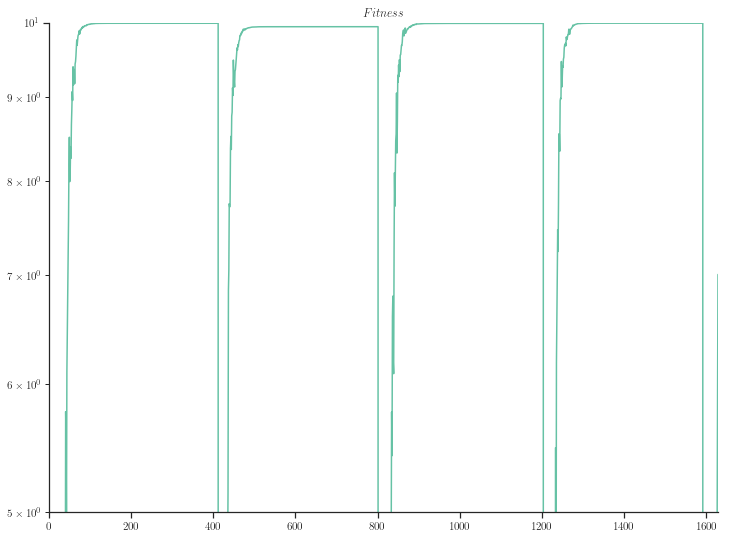

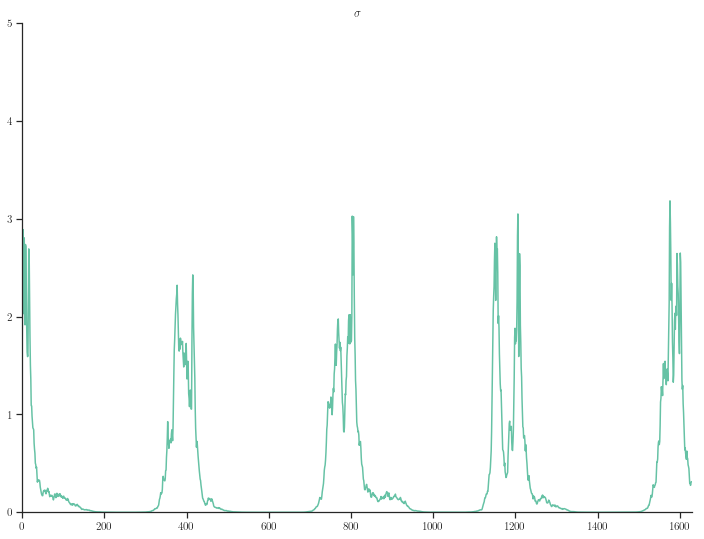

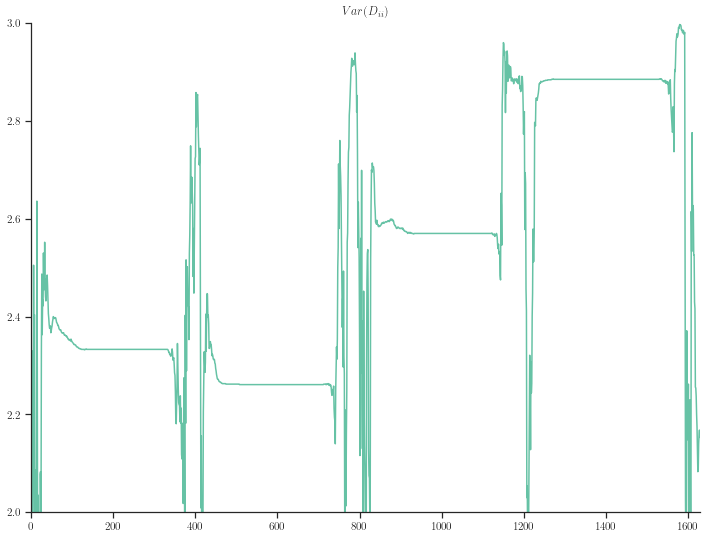

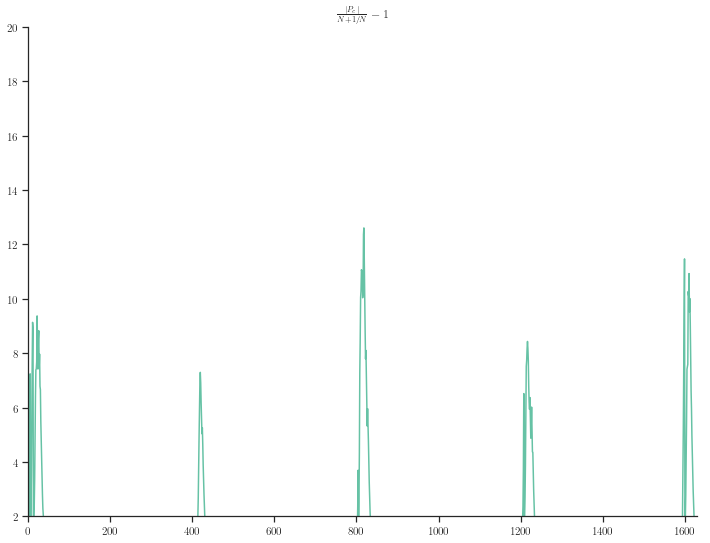

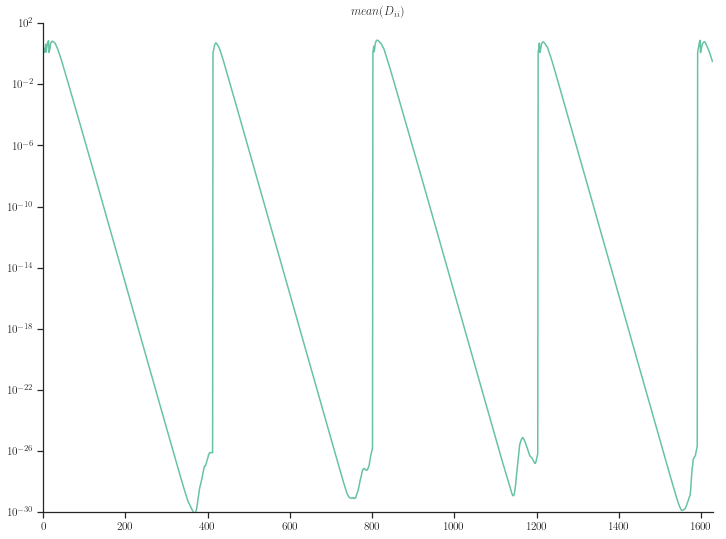

In [59]:
plot_csv_df(df, xlim=[0, len(df)])